# Training agents in parallel

In the previous notebook we have introduced the step-by step training procedure together with some other useful concepts and references. We dived into how to use a `DQNTrainer` to train one agent and we plotted the results.

Now, in order to perform proper benchmarks and evaluate the training procedure, we need to be able to train several agents under the same conditions with different initializations. Here, we will introduce how to train several agents in parallel using the `DQNTrainer`. 

In [1]:
from bounce.hamiltonian import XXHamiltonian
from bounce.budget_profiles import FlatProfile
from bounce.training import DQNTrainer
from bounce.utils import plot_trainings

import numpy as np
from matplotlib import pyplot as plt
from nbdev.showdoc import show_doc

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Problem deffinition

As previously introduced, we have to define the environment and agent basic parameters. 

In [2]:
N = 6

# Hamiltonian
B, J = [1]*N, [i%3 for i in range(N)]
H = XXHamiltonian(N, np.array(B), np.array(J))

#Computational budget
max_limit = 300
profile = FlatProfile(max_limit)

# Agent parameters
learning_rate = 5e-3
batch_size = 150
eps_decay = 0.95

# Training parameters
episodes = 400
time_steps = 7
opt = (-10.9443, 127) 
n_agents, jobs = 5, 5 # Parallel trainings and cores

## DQNTrainer

We are ready to define our `DQNTrainer` to perforeval_optims=arallel trainings in 5 separate threads. `DQNTrainer` already accounts for the possibility of running parallel jobs, making it extremely easy to train several agents at once. 

We need to specify the numer of agents `n_agents` to be trained and the number of paralle jobs `n_jobs` to perform the training. The only caveat is that we lose the nice progress bar. 

The agents save a "checkpoint" every `ckp` training episodes, where they store all the progress. The most important part about the checkpoints is that the agents save and reload their memory of pre-computed SDP results. This way, parallel agents can share pre-computed results and speed up the overall optimization process provided that these are SDPs that do not to be solved anymore. 

In [3]:
dqn = DQNTrainer(N, H, profile, n_agents=n_agents, n_jobs=jobs, 
                 learning_rate=learning_rate, batch_size=batch_size, eps_decay=eps_decay)

In [4]:
%time results = dqn.train(episodes=episodes, time_steps=time_steps)

CPU times: user 4.9 s, sys: 219 ms, total: 5.11 s
Wall time: 26.2 s


The function `plot_trainings` is prepared to take the mean among the independent trainings to plot the quantities.

<Figure size 720x2880 with 0 Axes>

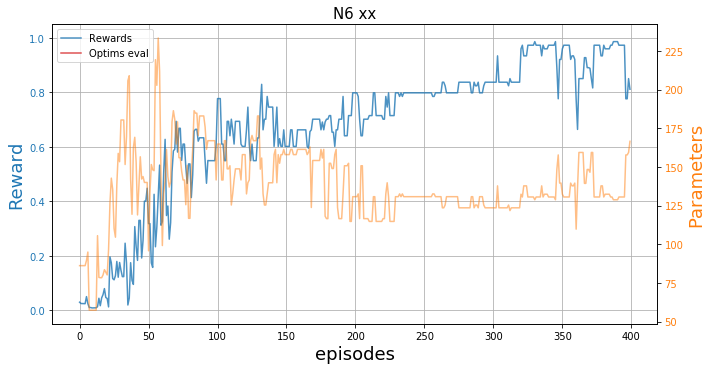

In [5]:
plt.figure(figsize=(10,40))
plot_trainings(results["training"])
plt.title(f"N{N} {H.model}",fontsize=15);

The mean reward has almost converged to 1, meaning that many agents have converged to find the optimal configuration. 